In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train_loan.csv")
test=pd.read_csv("test_loan.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape , test.shape

((614, 13), (367, 12))

In [9]:
#univariate analysis
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
#normalize is set to true to show proportions.
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

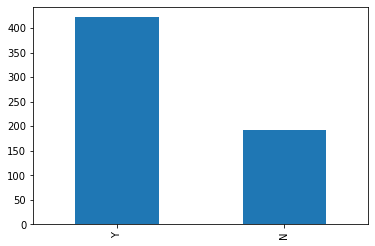

In [11]:
train['Loan_Status'].value_counts().plot.bar()

1.Categorical features: Gender,Married,Self_Employed,Credit_History,Loan_Status

2.Ordinal Features: Dependents,Education,Property_Area

3.Numerical Features:ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term

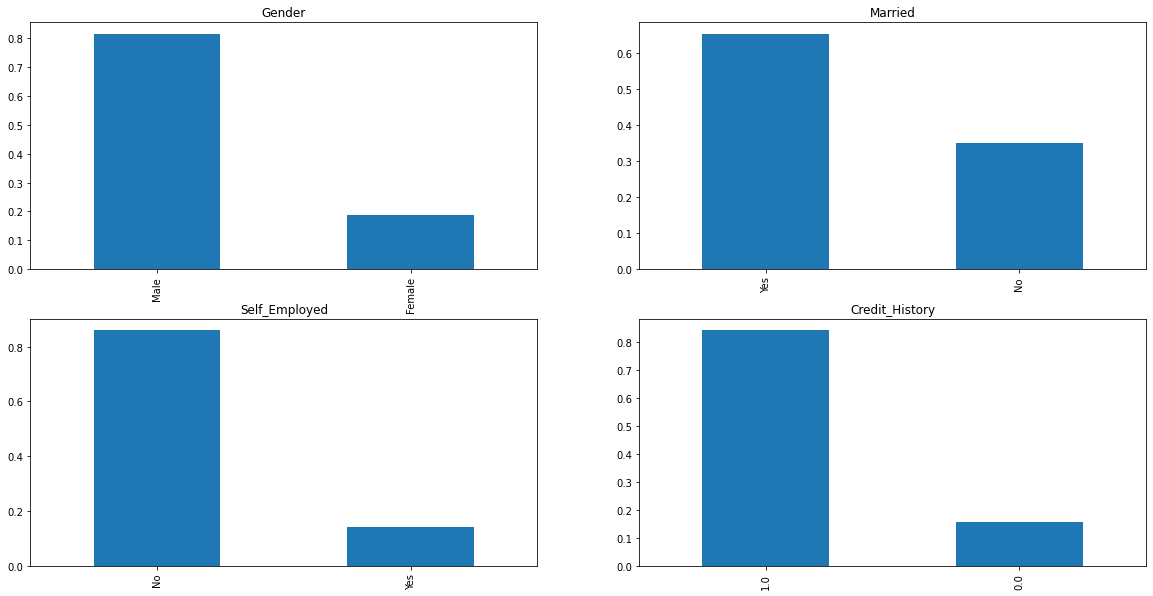

In [12]:
#independent categorical variables
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')
plt.show()

1.80% of the applicants are males.

2.65% of the applicants are married.

3.15% of the applicants are self-Employed.

4.85% of the applicants have repaid their loans.

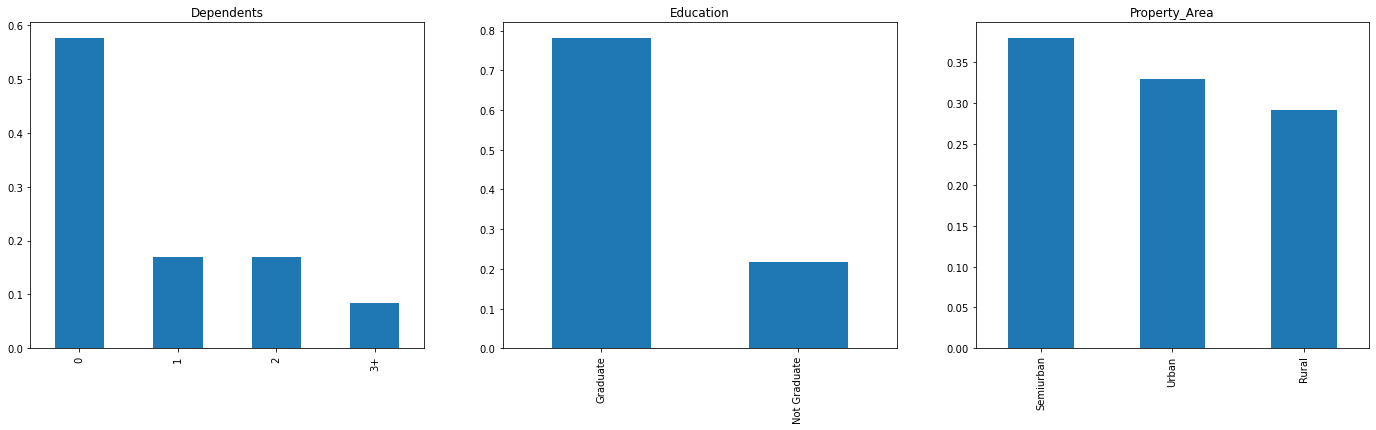

In [13]:
#independent ordinal varible
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area')
plt.show()

1.Most of the applicants donot have dependents.

2.Around 80% of the applicants are graduate.

3.Most of the applicants are from semiurban area.

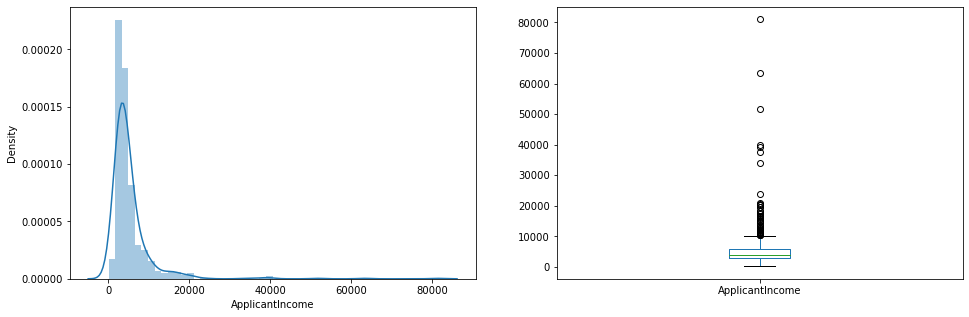

In [14]:
#independent numerical variables
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Most of the data is towards left means data is not normally distributed.

Bu the box plot indicates presence of lot of outliers/extreme values. This can be attributed to income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Text(0.5, 0.98, '')

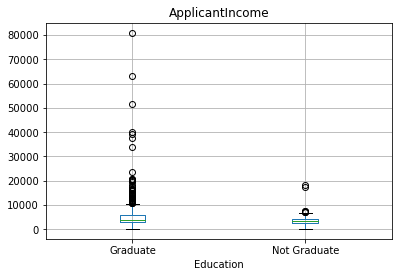

In [15]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")
#Text(0.5,0.98,'')

We can say that there are higher number of graduates with very high incomes, which are appearing to be outliers.


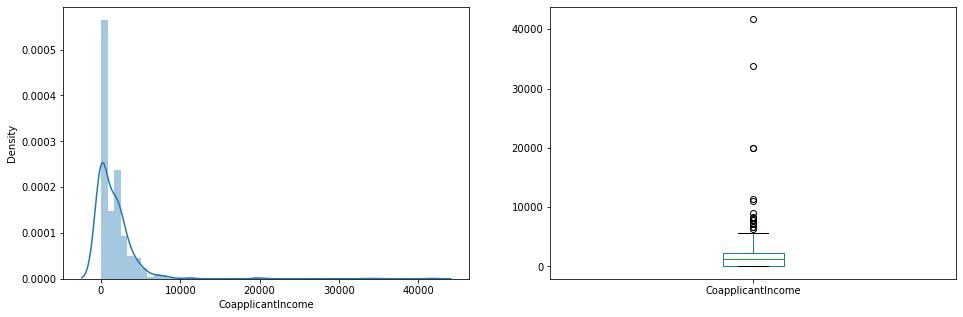

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Here similar distribution as that of applicantIncome is seen.

Also there are lot of outliers are present in CoapplicantIncome and it is also not normally distributed.

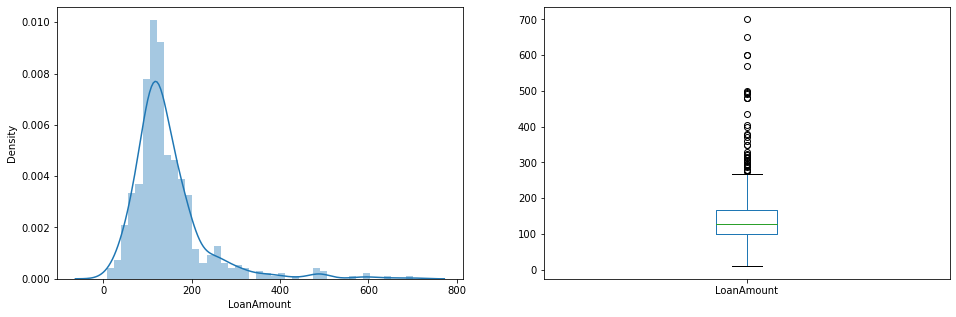

In [17]:
#loan amount variable
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Here also outliers are present but it is fairly normal.

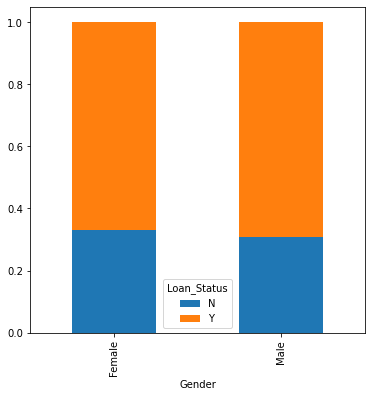

In [18]:
#bivarite analysis
#categorical Idv vs Target Variable
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,6))

Here it can be seen that proportion of approval or denial of loan for male or females is more or less same.

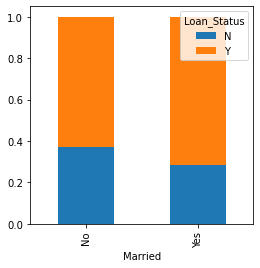

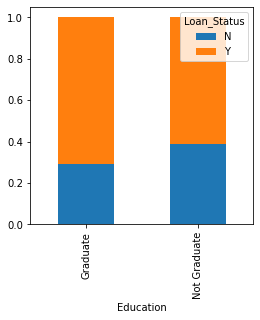

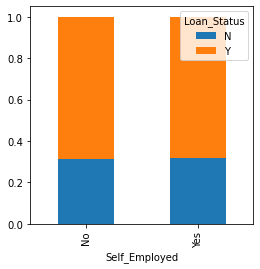

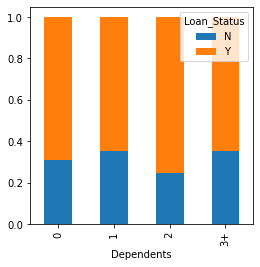

In [19]:
#remaining categorical varibles vs target variable
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

1.Proportion of married applicants is higher for approved loans.

2.Applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

3.There is nothing significant we can infer from self_employed.

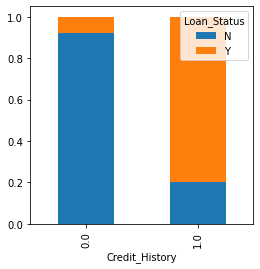

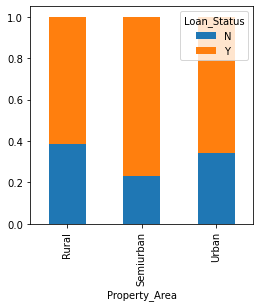

In [20]:
#for other categorical varibles vs Target Variable
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

Applicants with credit hsitory as 1 are likely to get loan.

Same for applicants in semiurban areas also.

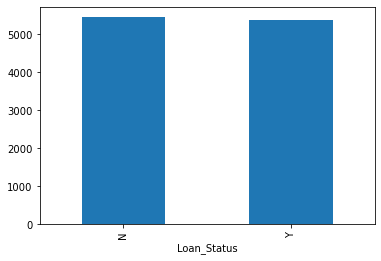

In [21]:
#now we will go for Idv vs Target Variable
#mean income of laon approved people vs mean income of denied people
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here we cannot say anyhting clear so lets go for bins for proper understanding.

Text(0, 0.5, 'Percentage')

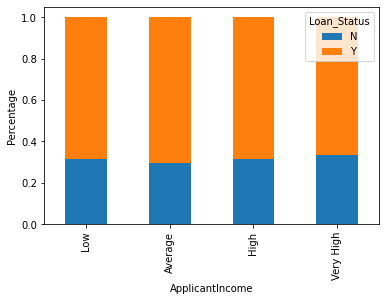

In [22]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Here can be seen that applicants income do not affect loan status so our hypothesis contradicts here.

Text(0, 0.5, 'Percentage')

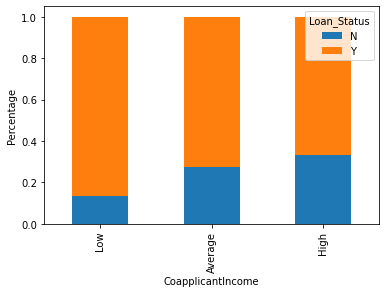

In [23]:
#we also analyze copplicant income and loan amount variable
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

It shows that if income is less chances of laon approval is very high but it is not true. Because most of the applicant dont have coapplicant which means coapplicant income is zero.So we can make anew variable to see combine effect on loan approval.

Text(0, 0.5, 'Percentage')

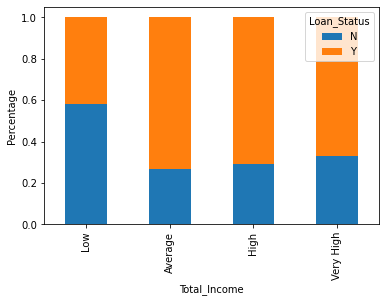

In [24]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Now it is clear that people with less income have less chances of loan approval as compared to other income categories.

Text(0, 0.5, 'Percentage')

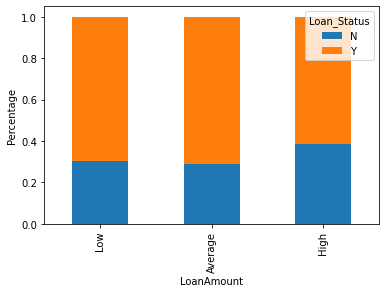

In [25]:
#lets predict loan amount variable
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

Here proportion of approved loans is higher for low and average loan amount as compared to high loan amount. Which supports our hypo.

In [26]:
train=train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'],axis=1)

train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

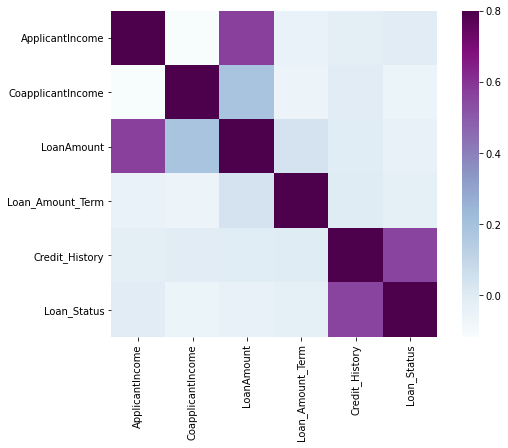

In [27]:
matrix=train.corr()

f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

Most correlated variables are ApplicantsIncome and LoanAmount

In [28]:
#missing value imputation
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Treat numerical variables using mean or median

Treat categorical variable using mode

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [30]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can seen that in loan amount term variable, the value 360 is repeating the most.So we will replace the msiing value in this variable using mode of this variable

In [31]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

Now see the loanamount varible.As it is numerical , we can use mean or median to impute the missing values. We well use median to fill the null values as earlier we saw that the laonamount have outliers so the mean will not be proper approach as it is highly affected by the presence of outliers.

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
#train['LoanAmount_bin'].drop['LoanAmount_bin']

In [35]:
#train.drop(['LoanAmount_bin','Total_Income','Total_Income_bin'],axis=1)

In [36]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

Outlier Treatment

Due to outliers bulk of data in the loan amount is at athe left and the right tail is longer. So there is right skewness. One way to remove the skewness is by doing the log transformation.It reduces larger values.So, we get a distribution similar to normal distribution.

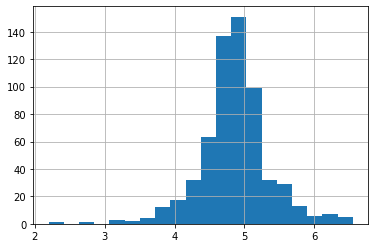

In [37]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(train['LoanAmount'])

Model Building

In [38]:
#logistic regression

In [39]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [40]:
#drop target variable from train dataset and sav eit in another dataset.
X=train.drop('Loan_Status',1)
y=train.Loan_Status

Now make dummy variable for the categorical variables.Dummy variable turns categorical variables into series of 0 and 1,making them easier to compare and quantify, as logistic regression takes only numerical values as input.

In [41]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

Now divide the train dataset into two parts:train and validation. We can make predictions on validation part and train the model on train part.

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,
                   max_iter=100,multi_class='ovr',n_jobs=1,penalty='12',random_state=1,
                   solver='liblinear',tol=0.0001,
                   verbose=0,warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.Smaller the values of C stronger the regularization.

In [44]:
pred_cv=model.predict(x_cv)

In [45]:
accuracy_score(y_cv,pred_cv)

0.8216216216216217

In [46]:
pred_test=model.predict(test)

# Decision Tree 

In [49]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor=DecisionTreeRegressor()
decision_regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [55]:
pred_dt=decision_regressor.predict(x_cv)

In [56]:
accuracy_score(y_cv,pred_dt)

0.7189189189189189